# Preprocessing Data

## Integrasi Data

[Sumber data dari Kaggle dengan judul Olympic Tokyo](https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo/version/7)

In [1]:
import pandas as pd

In [4]:
# Load Data Athlete
athlete = pd.read_excel('G:\.shortcut-targets-by-id\\1tw6CsgTzgMxIYBkoFdTr5yZKeJq1729j\KULIAH\\00 - UNEJ\PEMROGRAMAN\My Program\Athletes.xlsx')
athlete

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball
...,...,...,...
11080,ZWICKER Martin Detlef,Germany,Hockey
11081,ZWOLINSKA Klaudia,Poland,Canoe Slalom
11082,ZYKOVA Yulia,ROC,Shooting
11083,ZYUZINA Ekaterina,ROC,Sailing


**Agregasi data untuk mendapatkan berapa jumlah atlit yang dikirim oleh masing-masing negara**

In [5]:
athlete_country = athlete.groupby(['NOC'])['NOC'].count().reset_index(name='jumlah')
athlete_country.sort_values('jumlah', ascending=False)

,NOC,jumlah
195,United States of America,615
94,Japan,586
10,Australia,470
144,People's Republic of China,401
71,Germany,400
...,...,...
173,South Sudan,2
36,Central African Republic,2
157,Saint Kitts and Nevis,2
176,St Vincent and the Grenadines,2


**Load Data Medals untuk mengetahui berapa medali yang didapatkan suatu negara**

In [7]:
medals = pd.read_excel('G:\.shortcut-targets-by-id\\1tw6CsgTzgMxIYBkoFdTr5yZKeJq1729j\KULIAH\\00 - UNEJ\PEMROGRAMAN\My Program\Medals.xlsx')
medals.sort_values('Total', ascending=False)

C:\Users\wahab\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
4,5,ROC,20,28,23,71,3
3,4,Great Britain,22,21,22,65,4
2,3,Japan,27,14,17,58,5
...,...,...,...,...,...,...,...
77,77,Saudi Arabia,0,1,0,1,77
76,77,Bahrain,0,1,0,1,77
62,63,Bermuda,1,0,0,1,77
63,63,Morocco,1,0,0,1,77


Data Athletes dan medals akan digabungkan menggunakan kolom NOC pada athletes dan Team/NOC pada medals.
Untuk mempermudah proses join kita ubah nama kolom pada medals menjadi NOC.

**medals: Team/NOC->NOC**

In [8]:
medals.rename(columns={'Team/NOC':'NOC'}, inplace=True)
medals

,Rank,NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


Cek apakah terdapat data yang redundan pada medals dengan menggunakan aggregasi.

In [9]:
pd.set_option('display.max_rows', None)
medals_check = medals.groupby(['NOC'])['NOC'].count().reset_index(name='jumlah')
medals_check

,NOC,jumlah
0,Argentina,1
1,Armenia,1
2,Australia,1
3,Austria,1
4,Azerbaijan,1
5,Bahamas,1
6,Bahrain,1
7,Belarus,1
8,Belgium,1
9,Bermuda,1


Buat filter untuk mengetahui apakah ada NOC yang dituliskan 2 kali. Jika nilai pada kolom jumlah adalah 2 atau lebih maka terdapat data NOC lebih dari 1 pada suatu negara.

In [10]:
filter = medals_check['jumlah']==1
filter

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
30    True
31    True
32    True
33    True
34    True
35    True
36    True
37    True
38    True
39    True
40    True
41    True
42    True
43    True
44    True
45    True
46    True
47    True
48    True
49    True
50    True
51    True
52    True
53    True
54    True
55    True
56    True
57    True
58    True
59    True
60    True
61    True
62    True
63    True
64    True
65    True
66    True
67    True
68    True
69    True
70    True
71    True
72    True
73    True
74    True
75    True
76    True
77    True
78    True
79    True
80    True
81    True
82    True
83    True
84    True
85    True
86    True
87    True
88    True
89    True
90    True

Implementasikan hasil filter pada dataset medals dengan menggunakan where.

In [11]:
medals_check.where(filter).shape[0]

93

Membandingkan jumlah data yang telah difilter dengan data sebelum difilter. Tidak terdapat data NOC yang ditulis 2 kali atau lebih berarti tidak terdapat data yang redundan.

In [12]:
medals.shape[0]

93

Kemudian, kita gabungkan dataset athletes dan medals menggunakan kolom NOC dengan cara inner. Inner berarti hanya akan menggabungkan kedua dataset dengan nilai NOC yang sama.

In [13]:
country_medals = athlete_country.merge(medals, on='NOC', how='inner')
country_medals.sort_values('Rank by Total')

,NOC,jumlah,Rank,Gold,Silver,Bronze,Total,Rank by Total
90,United States of America,615,1,39,41,33,113,1
64,People's Republic of China,401,2,38,32,18,88,2
70,ROC,318,5,20,28,23,71,3
33,Great Britain,366,4,22,21,22,65,4
45,Japan,586,3,27,14,17,58,5
2,Australia,470,6,17,7,22,46,6
43,Italy,356,10,10,10,20,40,7
31,Germany,400,9,10,11,16,37,8
59,Netherlands,274,7,10,12,14,36,9
29,France,377,8,10,12,11,33,10


In [14]:
import matplotlib.pyplot as plt

Visualisasikan data dengan membandingkan antara jumlah athlete yang dikirim dengan jumlah medali yang didapatkan pada masing-masing negara.

<BarContainer object of 93 artists>

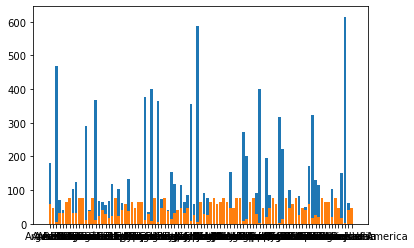

In [15]:
plt.bar(country_medals['NOC'],country_medals['jumlah'])
plt.bar(country_medals['NOC'],country_medals['Rank by Total'])

Dikarenakan terlalu banyak negara sehingga diagram tidak terlihat jelas maka kita dapat menampilkan data dengan kriteria tertentu.

In [16]:
country_medals.describe()

,jumlah,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,109.870968,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,131.153016,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,29.000000,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,60.000000,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,125.000000,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,615.000000,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


<BarContainer object of 12 artists>

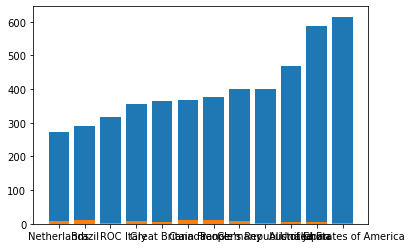

In [17]:
visualize_data = country_medals[country_medals['Total']>20].sort_values('jumlah')
plt.bar(visualize_data['NOC'],visualize_data['jumlah'])
plt.bar(visualize_data['NOC'],visualize_data['Rank by Total'])

------------------------------------------
## Menggunakan dataset Iris

In [18]:
pd.set_option('display.max_rows', 10)
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', delimiter=',',names=['sepal_length','sepal_width','petal_length','petal_width','class'])
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Normalisasi pada dataset Iris menggunakan normalisasi min-max

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Membagi fitur dan kelas

In [21]:
x = iris.iloc[:,:-1]
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:
y = iris.iloc[:,-1]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [23]:
scaller = MinMaxScaler()
scaller.fit(x)
x = pd.DataFrame(scaller.transform(x), columns=['sepal_length',	'sepal_width',	'petal_length',	'petal_width'])
x

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


## Diskritisasi 

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

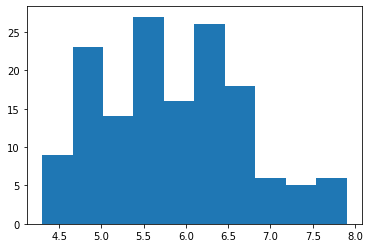

In [24]:
plt.hist(iris['sepal_length'])

(array([ 4.,  7., 22., 24., 38., 31.,  9., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

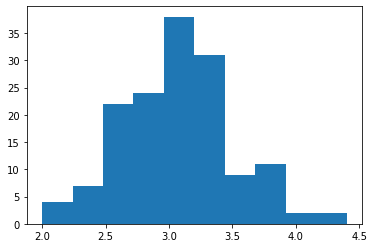

In [25]:
plt.hist(iris['sepal_width'])

In [26]:
 from sklearn.preprocessing import KBinsDiscretizer

In [27]:
discretizer = KBinsDiscretizer(encode='ordinal', strategy='uniform', n_bins=5)
discretizer.fit(x)
x = pd.DataFrame(discretizer.transform(x), columns=['sepal_length',	'sepal_width',	'petal_length',	'petal_width'])
x

,sepal_length,sepal_width,petal_length,petal_width
0,1.0,3.0,0.0,0.0
1,0.0,2.0,0.0,0.0
2,0.0,2.0,0.0,0.0
3,0.0,2.0,0.0,0.0
4,0.0,3.0,0.0,0.0
...,...,...,...,...
145,3.0,2.0,3.0,4.0
146,2.0,1.0,3.0,3.0
147,3.0,2.0,3.0,3.0
148,2.0,2.0,3.0,4.0
